# Task-2
To explore supervised machine learning 

Objective-To predict the score if the students study for 9.25 hours in a day.

# Simple linear regression
In this regression task we will predict the percentage of scores that a student is expected to score based upon the number of hours they studied. This is a simple linear 



# Importing Libraries

In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
import seaborn as sns
%matplotlib inline

In [3]:
dataset= pd.read_csv('C:/Users/acer/Downloads/student_scores data spark.csv')  #import the data 

In [4]:
dataset.shape

(25, 2)

In [5]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
dataset.describe()      # Basic details of the dataset

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Correlation

In [7]:
#Analysing the correlation between variables
correlation=dataset.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


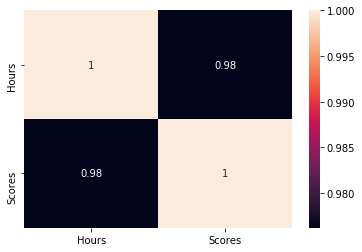

In [8]:
sns.heatmap(dataset.corr(),annot=True)

# Data Visualization

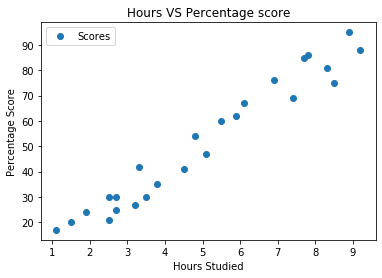

In [9]:
#Now plotting the distribution of scores
dataset.plot(x='Hours', y='Scores',style='o')         
plt.title('Hours VS Percentage score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the graph we can clearly see that there is a positive linear relation between the of hours and percentage of scores.

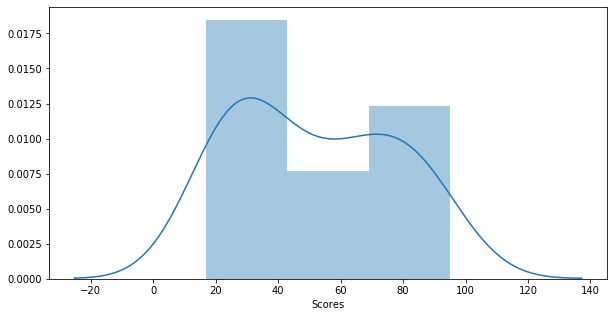

In [10]:
plt.figure(figsize=(10,5))    
plt.tight_layout()
seabornInstance.distplot(dataset['Scores'])

From the above graph we can see that average maximum percentage of scores is between 20 and 40 

In [11]:
x=dataset.iloc[:,:-1].values      # independent variable
y=dataset.iloc[:,1].values     # dependent variable

# Train Test Split

In [12]:
# Now split the data into 80% train and 20% test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

# Training the algorithm

In [13]:
#Training the algorithm
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(regressor.intercept_)           #intercept

2.018160041434683


In [15]:
print(regressor.coef_)       # slope(coefficient of x)

[9.91065648]


# Making predictions to the test data

In [16]:
# Making prediction on test data
y_pred=regressor.predict(x_test)

In [17]:
#Compare the actual output values for x_test with the predicted values.
df=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Graph of actual vs predicted values

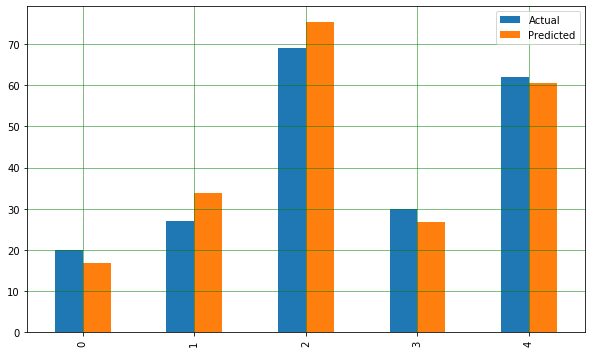

In [18]:
df.plot(kind='bar',figsize=(10,6))        #bar graph showing the comparison of actual and predicted values
plt.grid(which='major',linestyle='-', linewidth='0.5',color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

From the above bar graph we can clearly see that the predicted percentages are close to the actual ones, so our model is not very precise.

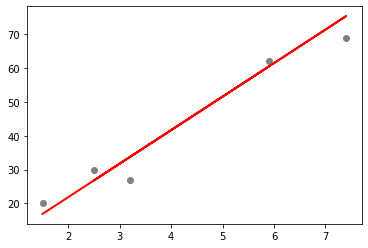

In [23]:
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

The staright line in the above graph shows our algorithm is correct.

# Predicting the score if a student study 9.25 hours in a day

In [20]:
Hours=9.25
pred=regressor.predict([[Hours]])
print("Number of hours=",format(Hours))
print("Predicted Score=", format(pred[0]))

Number of hours= 9.25
Predicted Score= 93.69173248737538


# Evaulating the algorithm

In [24]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665


The value of root mean squared error is 4.64, which is less than  10% of the mean value of the percentages of all the students i.e. 51.48